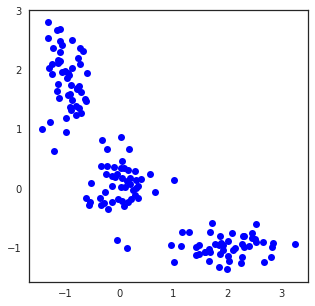

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline

X = np.zeros((150, 2))

np.random.seed(seed=17)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

In [23]:

def DBSCAN(D, eps, MinPts):
    """
    Функция принимает датасет D,
    расстояние eps,
    требуемое количество точек MinPts
    """
    labels = [0]*len(D) # вначале присваиваем всем нулевой кластер
    C = 1 # Текущая метка кластера
    for pt in range(X.shape[0]):
        if labels[pt]==0:
            neighbors = []            
            label_index = []
            # Для каждой точки в датасете D
            for i in range(X.shape[0]):
                # Находим всех соседей этой точки на расстоянии меньше eps 
                if np.linalg.norm(X[pt]-X[i])<eps:
                    neighbors.append(X[i])
                    label_index.append(i)
            # Если количество соседей для точки меньше минимального количества
            if len(neighbors) < MinPts:
                for i in range(len(labels)):
                    if i in label_index:
                        labels[i]=-1 # Считаем точку выбросом и присваиваем ей метку -1
            else:
                for i in range(len(labels)):
                    if i in label_index:
                        labels[i] = C
        C= C+1
    return labels



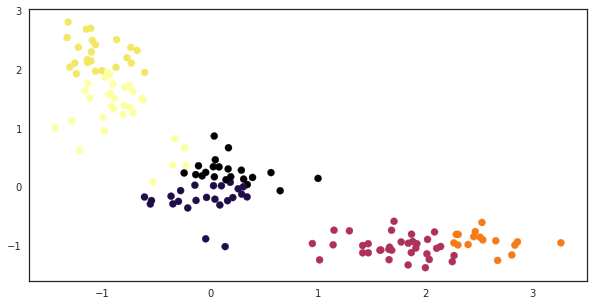

In [24]:
labels = DBSCAN(X, 1, 3)

fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(X[:,0],X[:,1],c=labels,s=50,cmap = 'inferno')

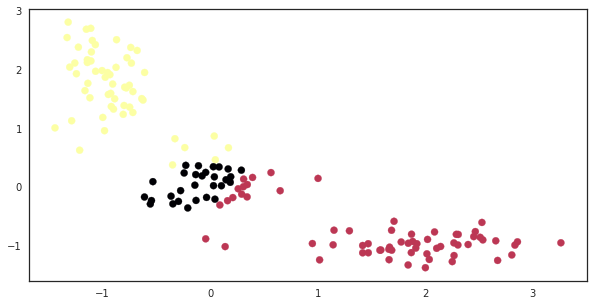

In [26]:
labels = DBSCAN(X, 2, 5)

fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(X[:,0],X[:,1],c=labels,s=50,cmap = 'inferno')